In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cancer=pd.read_csv("/content/Breast_cancer_data.csv")
cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
cancer.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [6]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [7]:
cancer["diagnosis"].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

Text(0.5, 1.0, 'Data correlation')

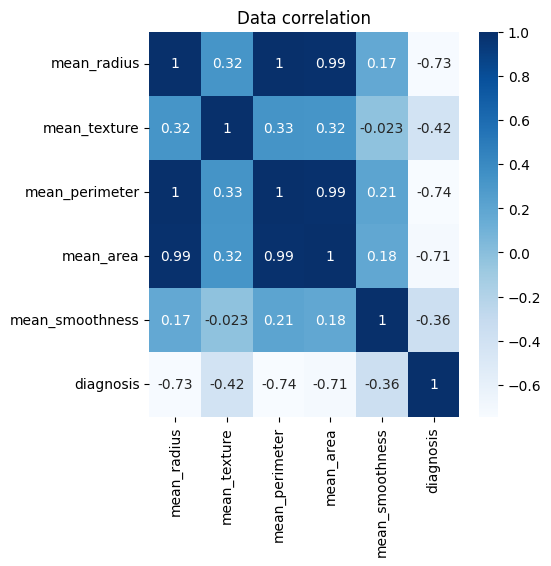

In [8]:
corr=cancer.corr()
plt.figure(figsize=(5,5))
r=sns.heatmap(corr,cmap="Blues",annot=True)
r.set_title("Data correlation")

In [9]:
x=cancer.iloc[:,:2]
y=cancer.iloc[:,-1]


In [10]:
x.head()

,mean_radius,mean_texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 2)
(114, 2)
(455,)
(114,)


In [14]:
from sklearn.svm import SVC

In [15]:
SVC_diag = SVC(C=10, kernel="linear")
SVC_diag.fit(x_train,y_train)

SVC(C=10, kernel='linear')

In [16]:
pred=SVC_diag.predict(x_test)
pred

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1])

<Figure size 800x1000 with 0 Axes>

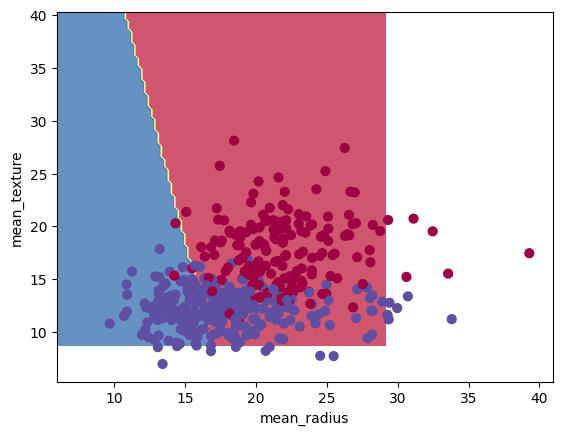

In [17]:
from sklearn.inspection import DecisionBoundaryDisplay
plt.figure(figsize=(8,10))
DecisionBoundaryDisplay.from_estimator(SVC_diag,x_train,ax=None,
response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8)
plt.scatter(x_train.iloc[:,1],x_train.iloc[:,0],c=y_train,s=40,cmap=plt.cm.Spectral)
plt.show()

In [18]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,pred)
acc

0.8508771929824561

In [19]:
SVC_diag_1=SVC(C=10,kernel="rbf",gamma=2)
SVC_diag_1.fit(x_train,y_train)

SVC(C=10, gamma=2)

In [20]:
pred_1=SVC_diag_1.predict(x_test)
pred_1

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1])

In [21]:
acc_1=accuracy_score(y_test,pred_1)
acc_1

0.8157894736842105

In [22]:
SVC_diag_1.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 2,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [23]:
SVC_diag.n_features_in_

2

In [24]:
SVC_diag_1=SVC(C=10,kernel="rbf",gamma=2,probability=True)
SVC_diag_1.fit(x_train,y_train)
SVC_diag_1.predict_proba(x_test)

array([[2.54197257e-01, 7.45802743e-01],
       [7.47622622e-02, 9.25237738e-01],
       [3.48633658e-02, 9.65136634e-01],
       [8.31932965e-01, 1.68067035e-01],
       [5.70819104e-01, 4.29180896e-01],
       [8.81481484e-01, 1.18518516e-01],
       [4.71974324e-01, 5.28025676e-01],
       [8.09731058e-01, 1.90268942e-01],
       [9.87210902e-02, 9.01278910e-01],
       [1.50882883e-01, 8.49117117e-01],
       [6.32976599e-02, 9.36702340e-01],
       [8.01151641e-01, 1.98848359e-01],
       [7.21750076e-01, 2.78249924e-01],
       [5.52448955e-02, 9.44755104e-01],
       [4.46596140e-01, 5.53403860e-01],
       [9.70768717e-02, 9.02923128e-01],
       [1.11931228e-01, 8.88068772e-01],
       [1.56036163e-01, 8.43963837e-01],
       [1.09207928e-01, 8.90792072e-01],
       [8.55028522e-01, 1.44971478e-01],
       [2.57864702e-02, 9.74213530e-01],
       [2.06635921e-01, 7.93364079e-01],
       [8.67734815e-01, 1.32265185e-01],
       [1.70911188e-02, 9.82908881e-01],
       [6.849114

In [25]:
pred_2=SVC_diag.predict(x_test)

In [26]:
acc_2=accuracy_score(y_test,pred_2)
acc_2

0.8508771929824561